# Intuition

Builds on formula: `y = b_0 + b_1 * x_1`

* Dependent variable: y
* Independent variable: x_1
* Coefficient b_1: How does unit change in x influence unit change in y

A regression attempts putting the best fitting line through the scatter data.

* b_0 - The cut. If zero years experience - what salary?
* b_1 - The rate of increase.

# How to find the best trend line?

Notation:

* y_i - Individual datapoint, observed in the wild
* y^_i - Predicted position for the datapoint, where it would have ended up based on prediction, the modelled outcome

Getting best fit: Find minimum sum of squares

# Setup the dataset

* Independent variable: Years of experience
* Salary: Dependent

We want to predict salary based  on years of experience.

In [4]:
library(caTools)
set.seed(123)

In [11]:
fp <- "../machine_learning_template_folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/Simple_Linear_Regression/Salary_Data.csv"
df <- read.csv(fp)
dim(df)
head(df)

split <- sample.split(df$Salary, SplitRatio=2/3)
training_set <- subset(df, split == TRUE)
test_set <- subset(df, split == FALSE)

dim(training_set)
dim(test_set)

[1] 30  2

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642


[1] 20  2

[1] 10  2

# Build the linear regression model

Model setup: `Predicted ~ Predictor`

We see high significance for correlation.

In [14]:
regressor <- lm(formula=Salary~YearsExperience, data=training_set)
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7590.1 -3957.9  -458.7  3129.7 11934.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      26094.3     2857.1   9.133 3.54e-08 ***
YearsExperience   9318.6      497.7  18.725 2.99e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5803 on 18 degrees of freedom
Multiple R-squared:  0.9512,	Adjusted R-squared:  0.9485 
F-statistic: 350.6 on 1 and 18 DF,  p-value: 2.994e-13


# Prediction

In [17]:
y_pred <- predict(regressor, newdata=test_set)
y_pred

5         7         8         9        11        13        24        27 
 46595.15  54050.03  55913.75  55913.75  62436.76  63368.62 102506.71 114620.88 
       28        29 
115552.74 122075.75

In [18]:
head(test_set)

,YearsExperience,Salary
5,2.2,39891
7,3.0,60150
8,3.2,54445
9,3.2,64445
11,3.9,63218
13,4.0,56957


# Visualize

We visualize:

* Red dots are training points, datapoints used for prediction
* Blue line is predicted line based on data from training set

In [20]:
library(ggplot2)

## Visualize the training set

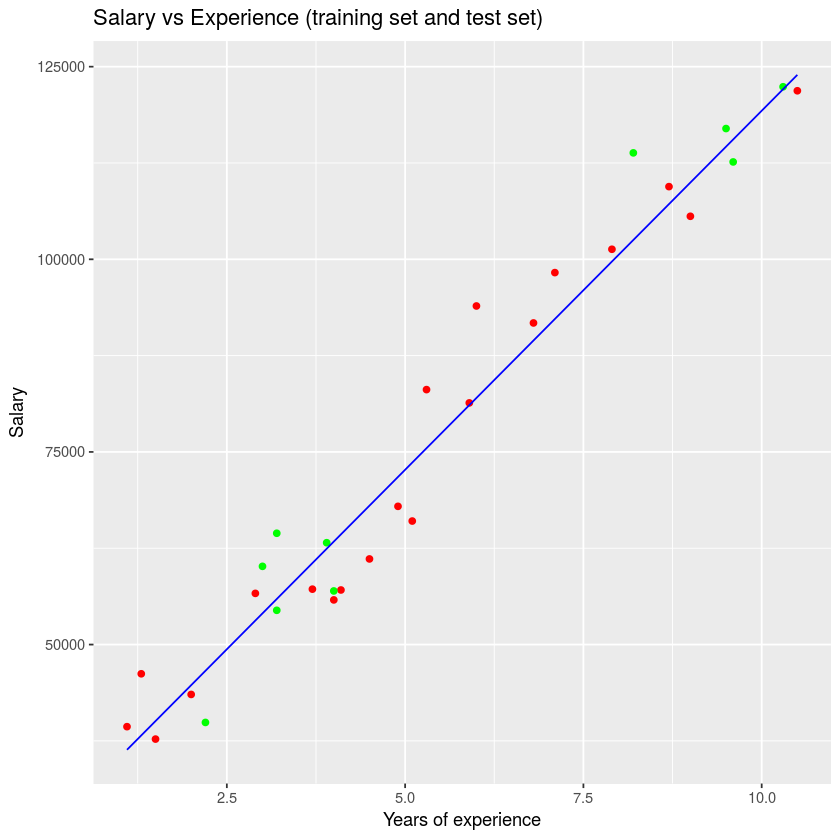

In [28]:
ggplot() + 
    geom_point(
        aes(x=training_set$YearsExperience, 
            y=training_set$Salary),
            color='red') +
    geom_point(
        aes(x=test_set$YearsExperience, 
            y=test_set$Salary),
            color='green') +
    geom_line(aes(x=training_set$YearsExperience,
                  y=predict(regressor, newdata=training_set)),
              color='blue') +
    ggtitle('Salary vs Experience (training set and test set)') +
    xlab('Years of experience') +
    ylab('Salary')